In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [4]:
df.isna().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

<Axes: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

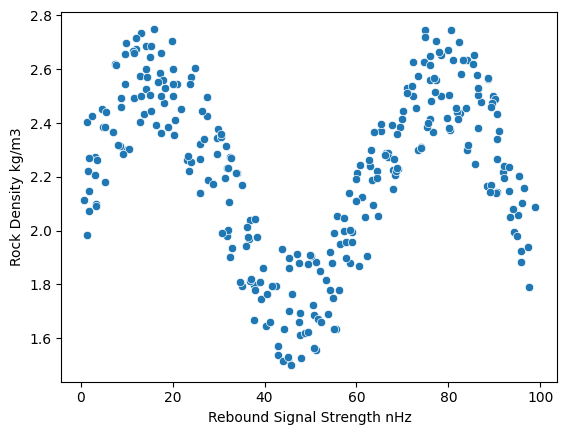

In [5]:
sns.scatterplot(data=df, x='Rebound Signal Strength nHz', y='Rock Density kg/m3')

In [6]:
df.columns=['Signal',"Density"]

In [7]:
X = df['Signal'].values.reshape(-1, 1)

In [8]:
y = df['Density']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Linear regression model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [13]:
lr_prediction = lr_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
np.sqrt(mean_squared_error(y_test,lr_prediction))

np.float64(0.2928014017261052)

In [16]:
signal_range = np.arange(0,100)
lr_output = lr_model.predict(signal_range.reshape(-1,1))

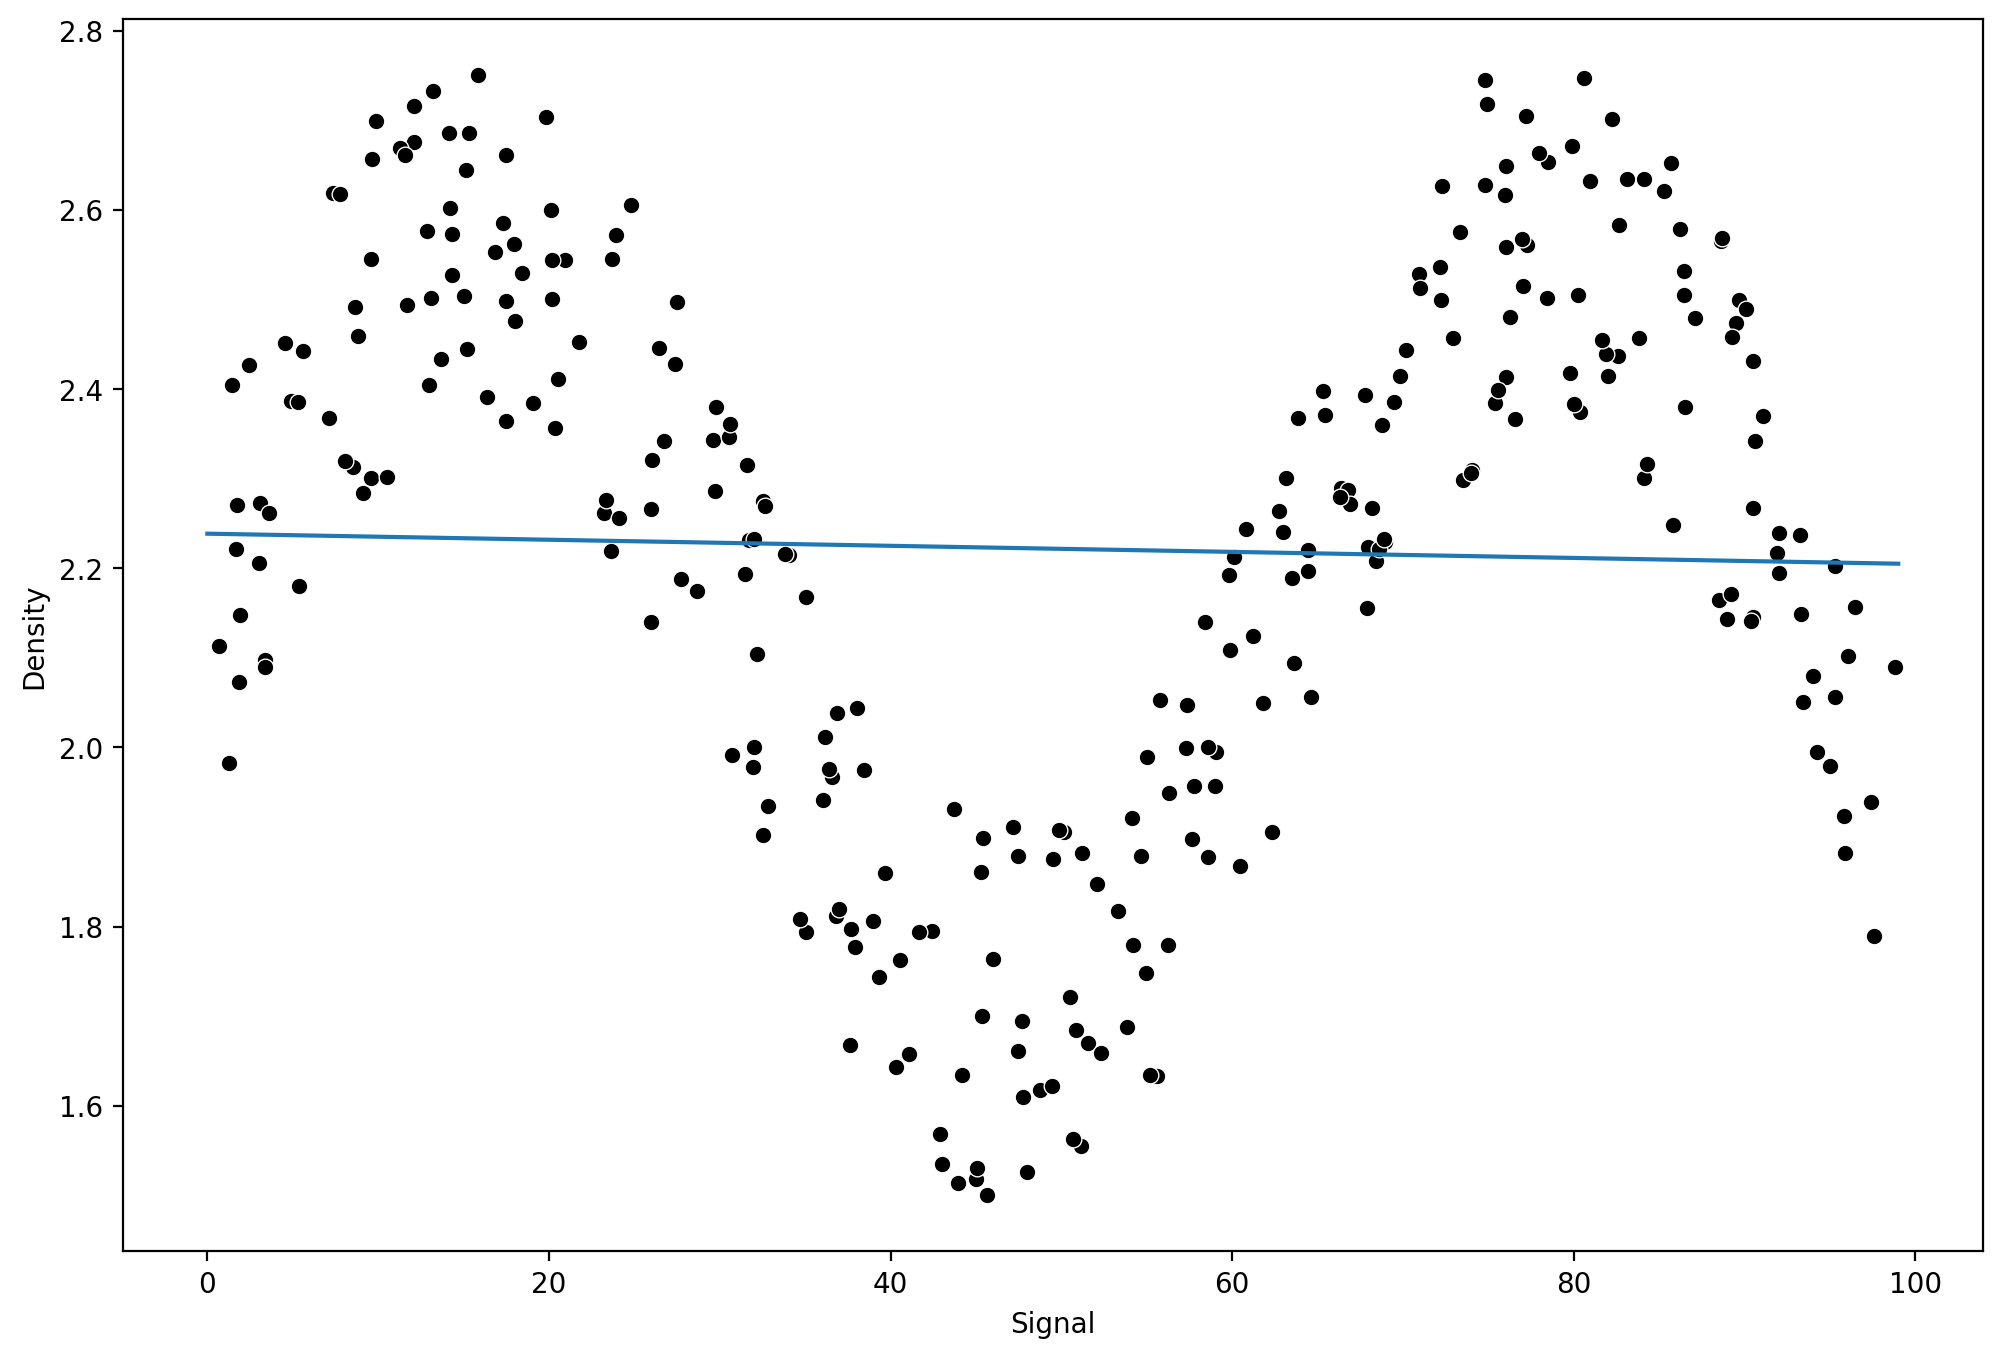

In [17]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

In [18]:
# Residuals (остатки)
model_residuals = y_test - lr_prediction
model_residuals

176   -0.056996
250    0.411537
12     0.003837
16     0.091061
258   -0.313618
         ...   
282    0.029657
242    0.355440
119    0.134130
57    -0.150040
37     0.096026
Name: Density, Length: 90, dtype: float64

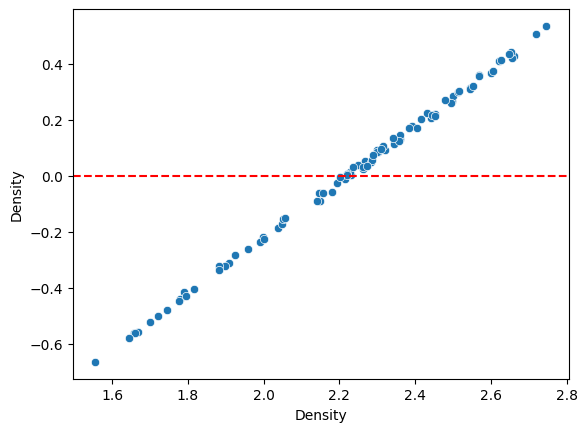

In [19]:
sns.scatterplot(x=y_test, y=model_residuals)
plt.axhline(y=0, color='red', ls='--')

#### Polinomial regression

In [20]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Обучение модели
    model.fit(X_train,y_train)
    
    # Вычисление метрик
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')
    
    # Рисуем график с результатами
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2928014017261052
MAE : 0.2369211828242143


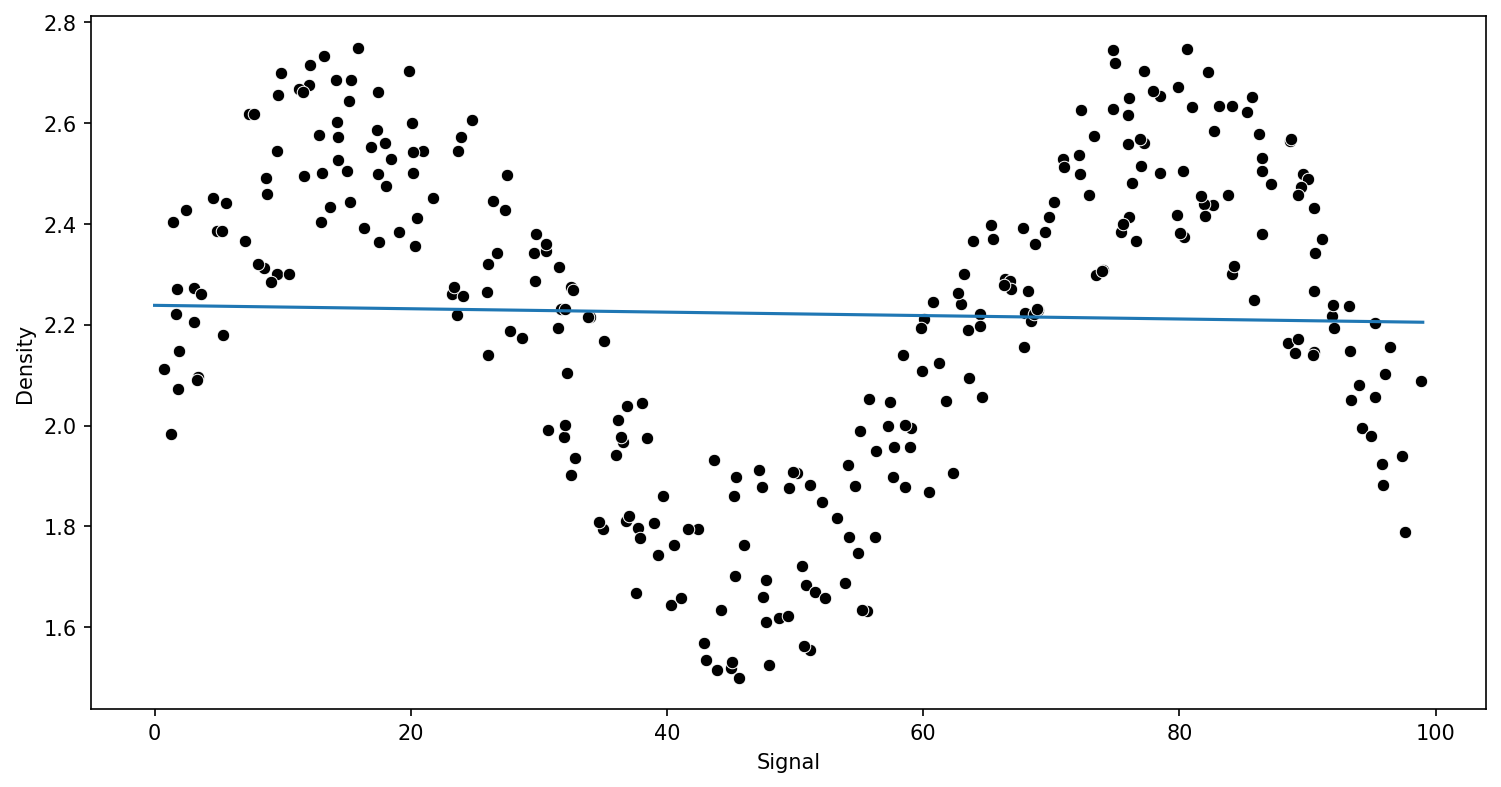

In [21]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pipe = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())

RMSE : 0.28551731918264184
MAE : 0.23856273226353808


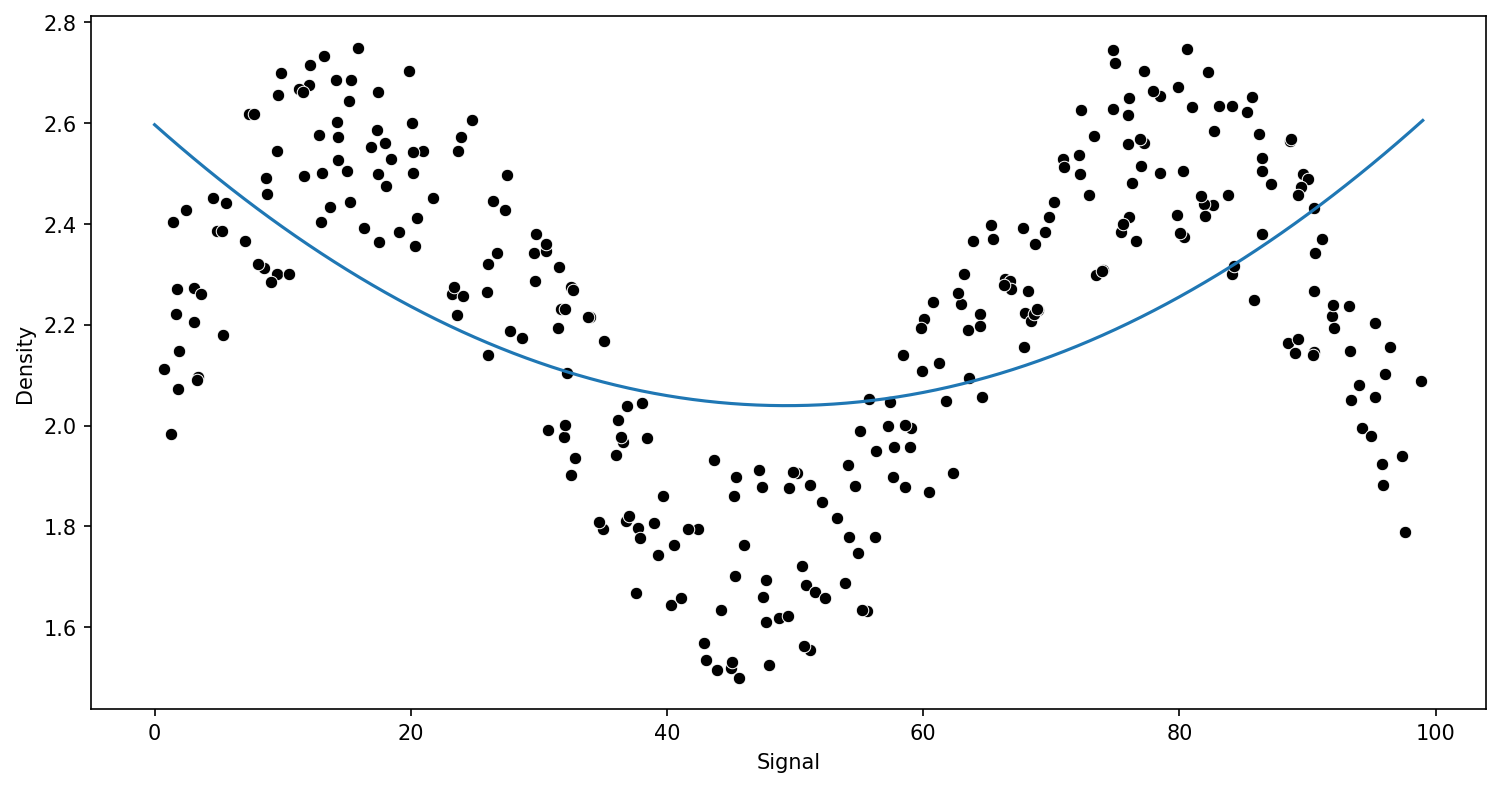

In [25]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Сравнение различных степеней полинома

RMSE : 0.13328124387882448
MAE : 0.11503333720555303


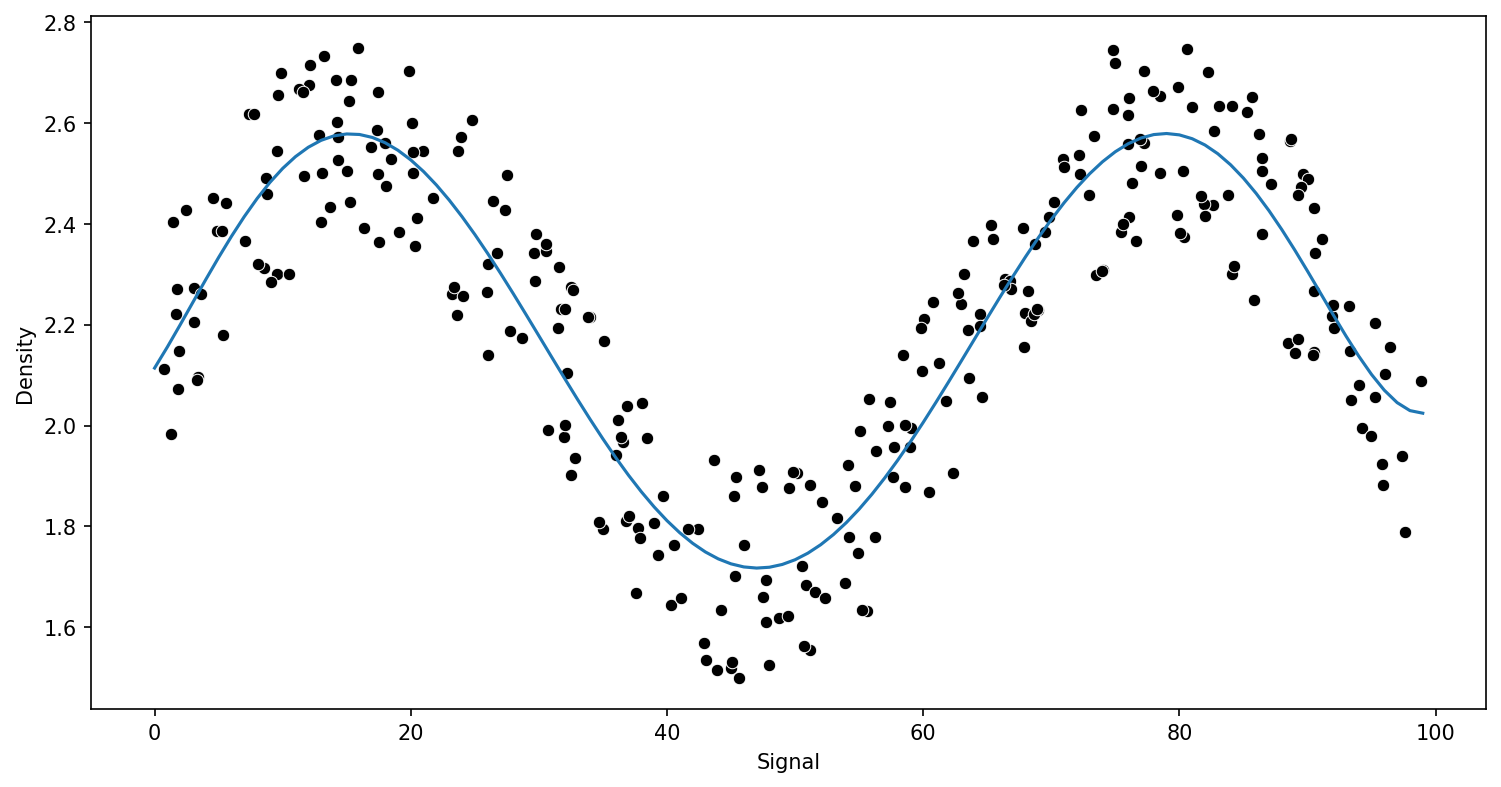

In [26]:
pipe = make_pipeline(PolynomialFeatures(degree = 6),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## Регрессия KNN 

In [27]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.16153547162673088
MAE : 0.12817936228823248
RMSE : 0.1400166117231861
MAE : 0.11823219946159098
RMSE : 0.1408050741503751
MAE : 0.12059189553582521
RMSE : 0.1594705409490426
MAE : 0.1311012410531616


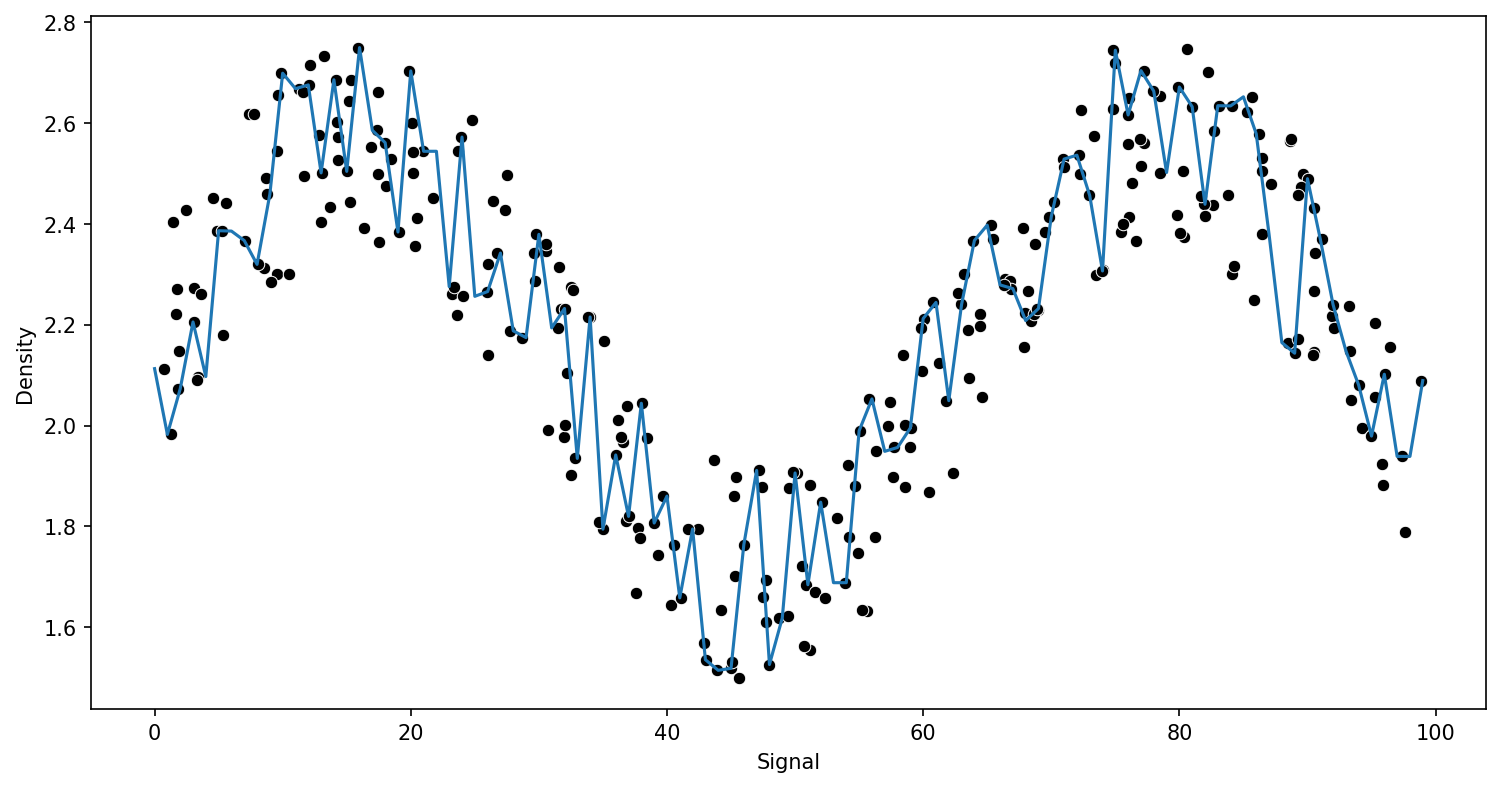

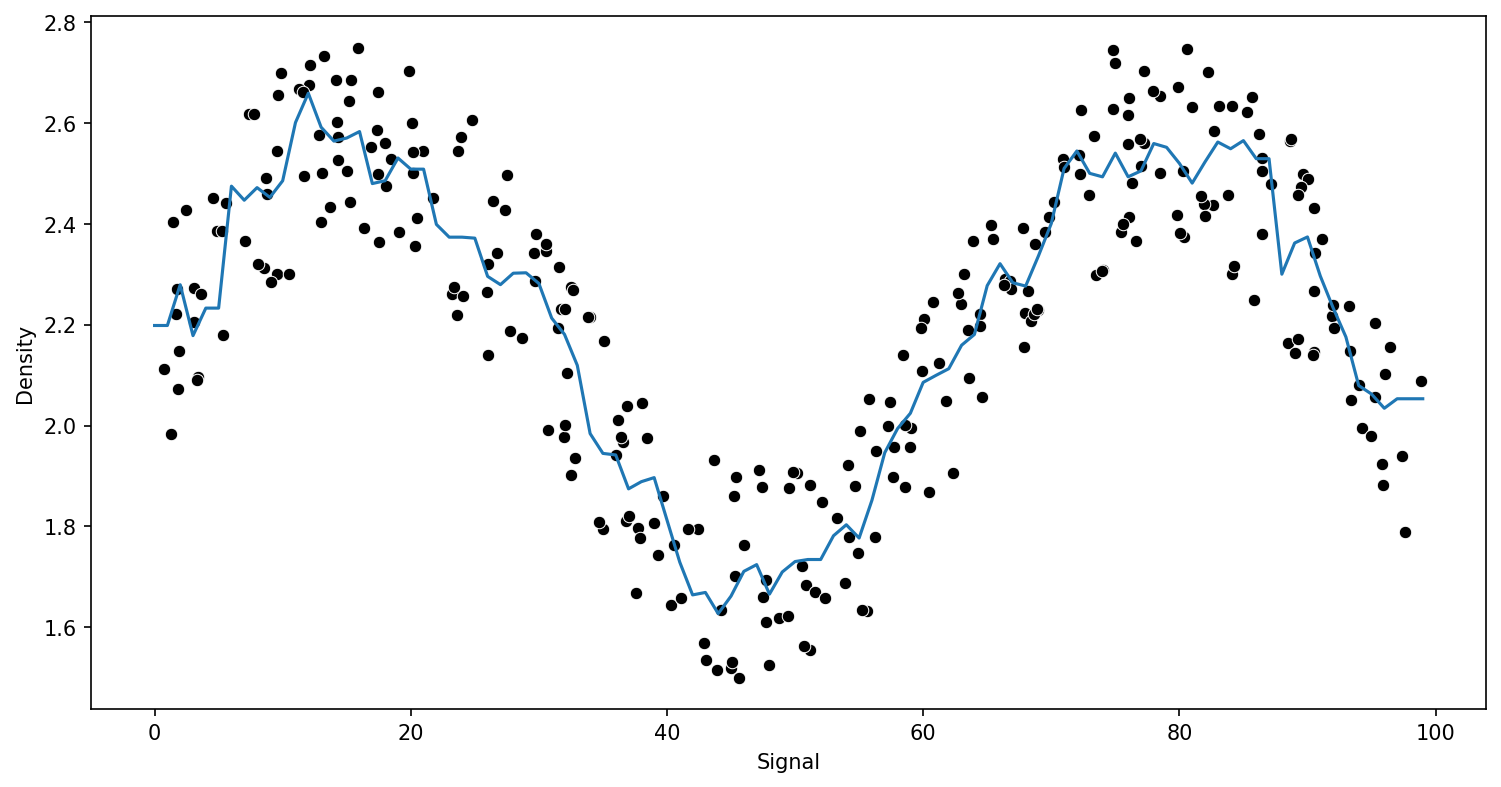

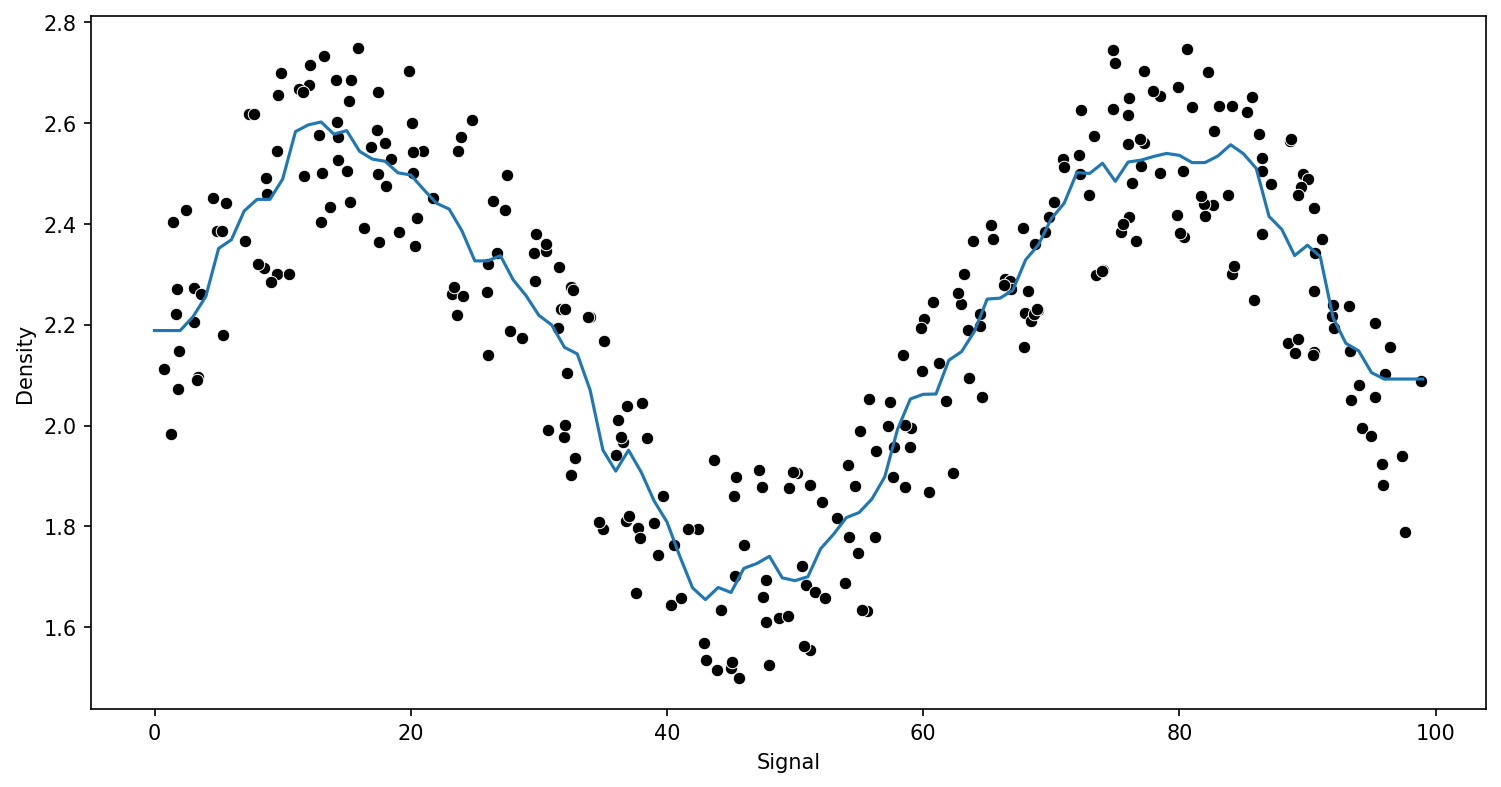

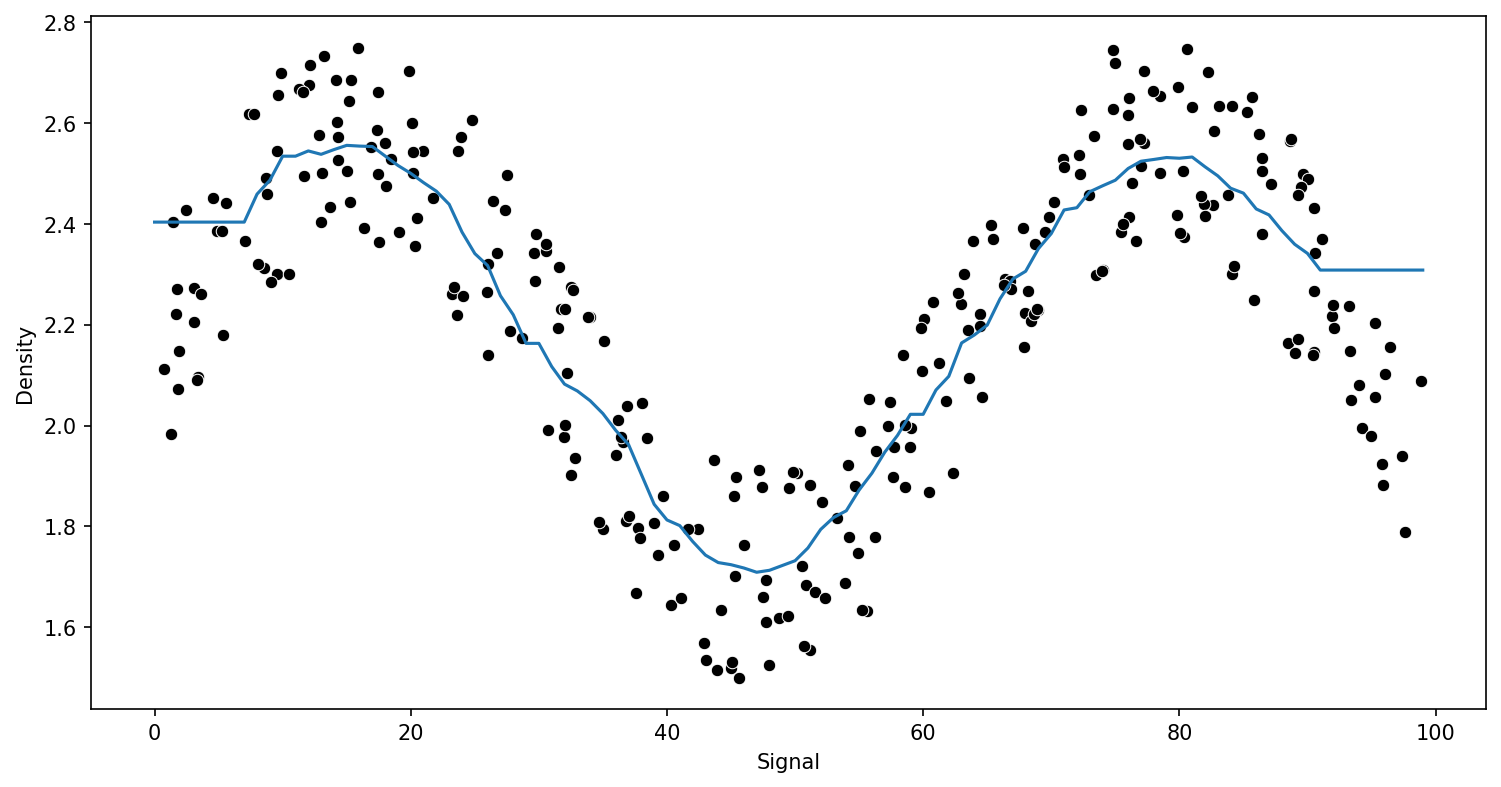

In [28]:
preds = {}
k_values = [1,5,10, 30]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Деревья решений для регрессии

In [29]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.16153547162673088
MAE : 0.12817936228823248


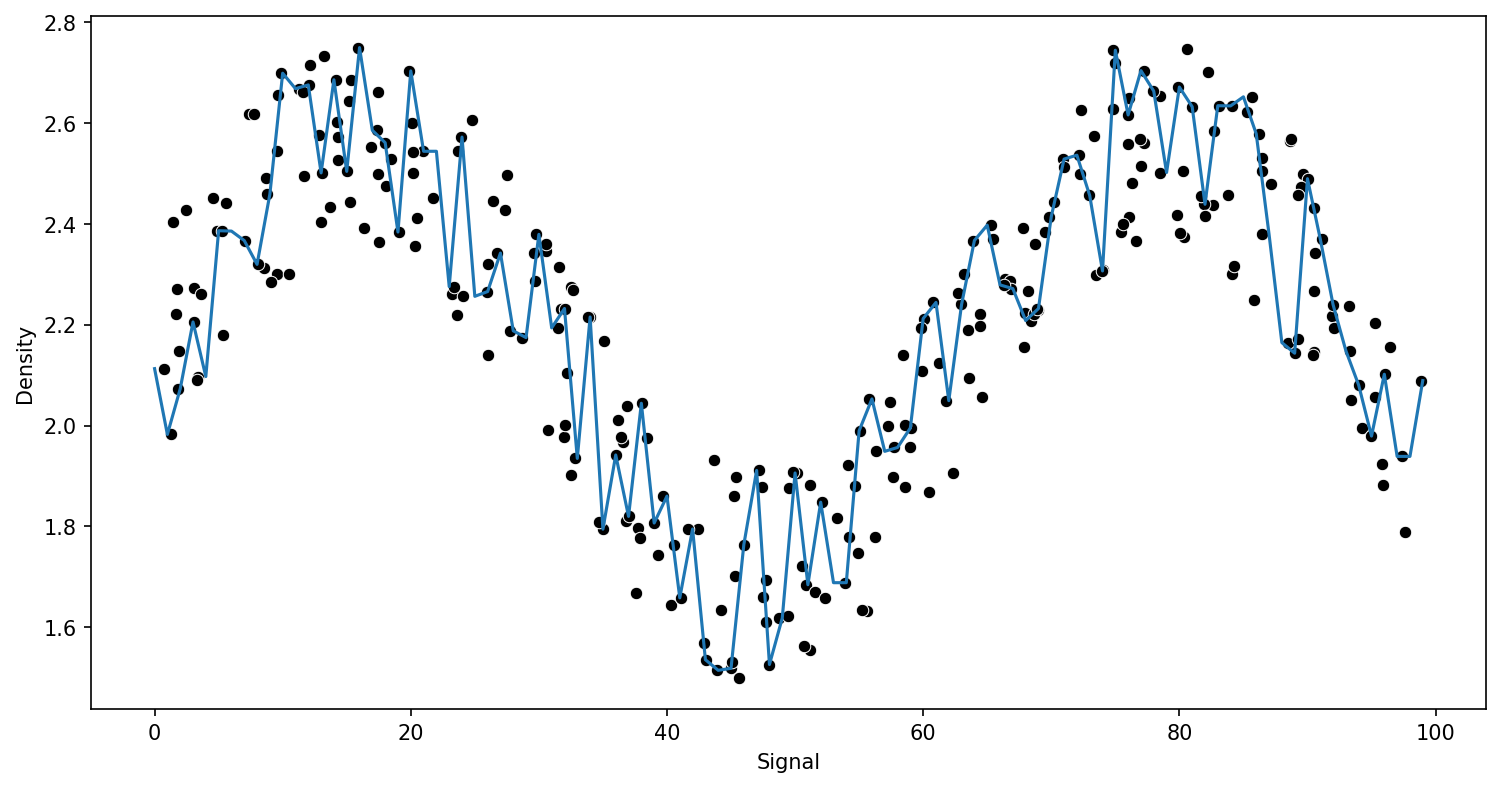

In [30]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [31]:
model.get_n_leaves()

np.int64(210)

----

## Метод опорных векторов для регрессии

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [47]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
grid = GridSearchCV(svr,param_grid)

RMSE : 0.13004609494553804
MAE : 0.11127327567318512


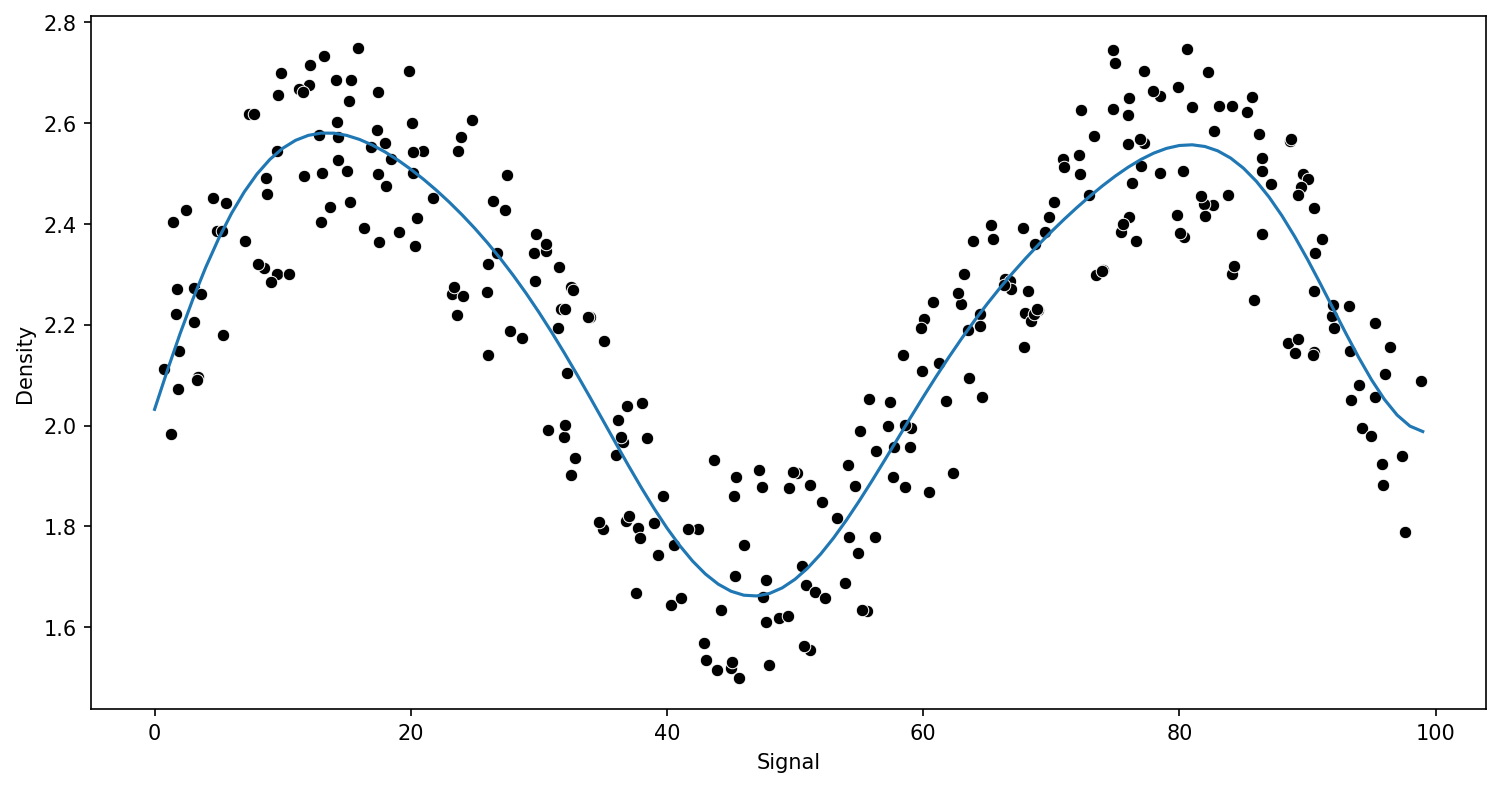

In [48]:
run_model(grid,X_train,y_train,X_test,y_test)

In [45]:
grid.best_estimator_

SVR(C=1000)

---

## Случайные леса для регрессии

In [39]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.13968928312213233
MAE : 0.11231327341901197
RMSE : 0.13919429451594323
MAE : 0.11553928936640111
RMSE : 0.14098815626600503
MAE : 0.11669572811093319


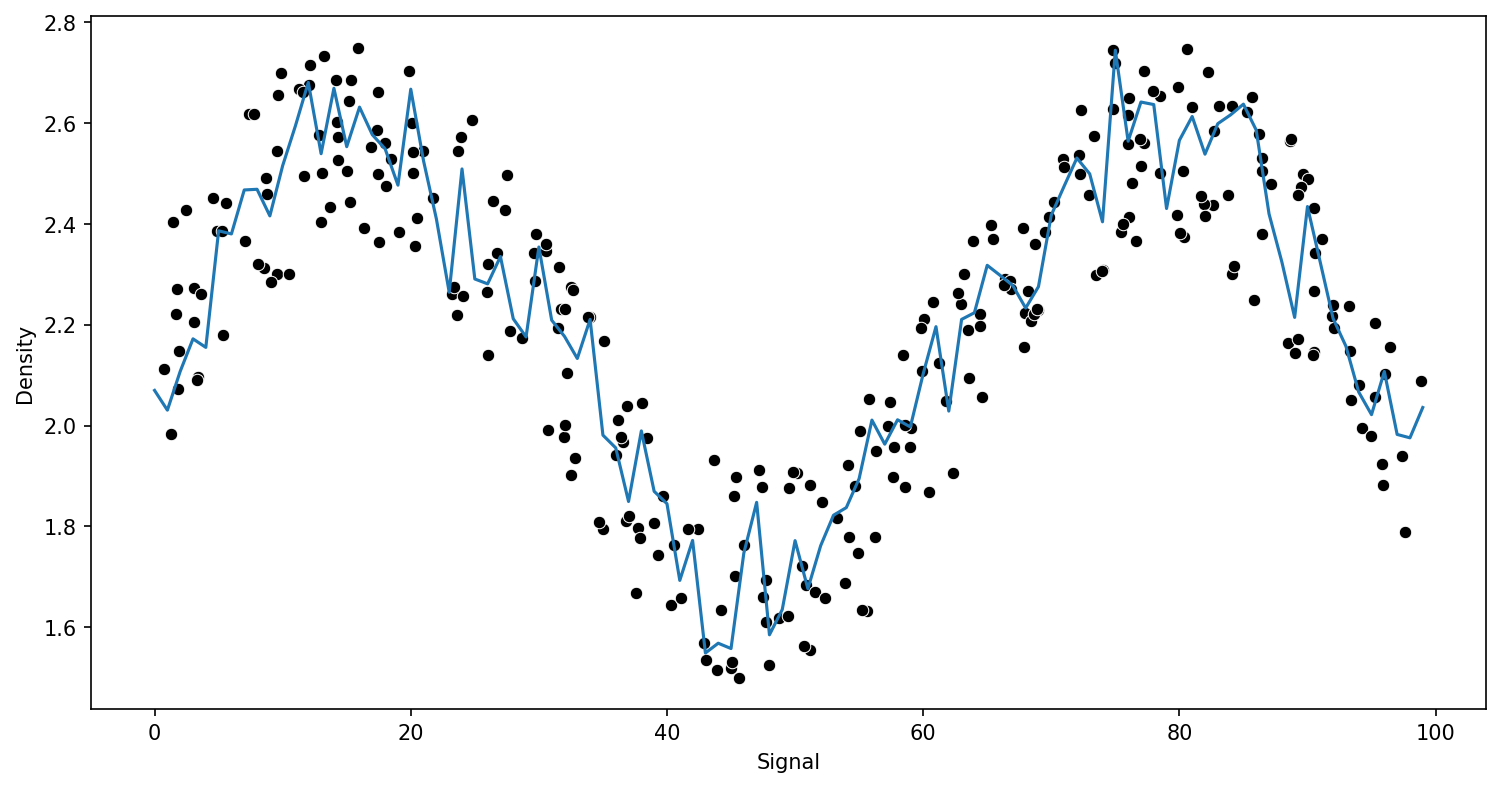

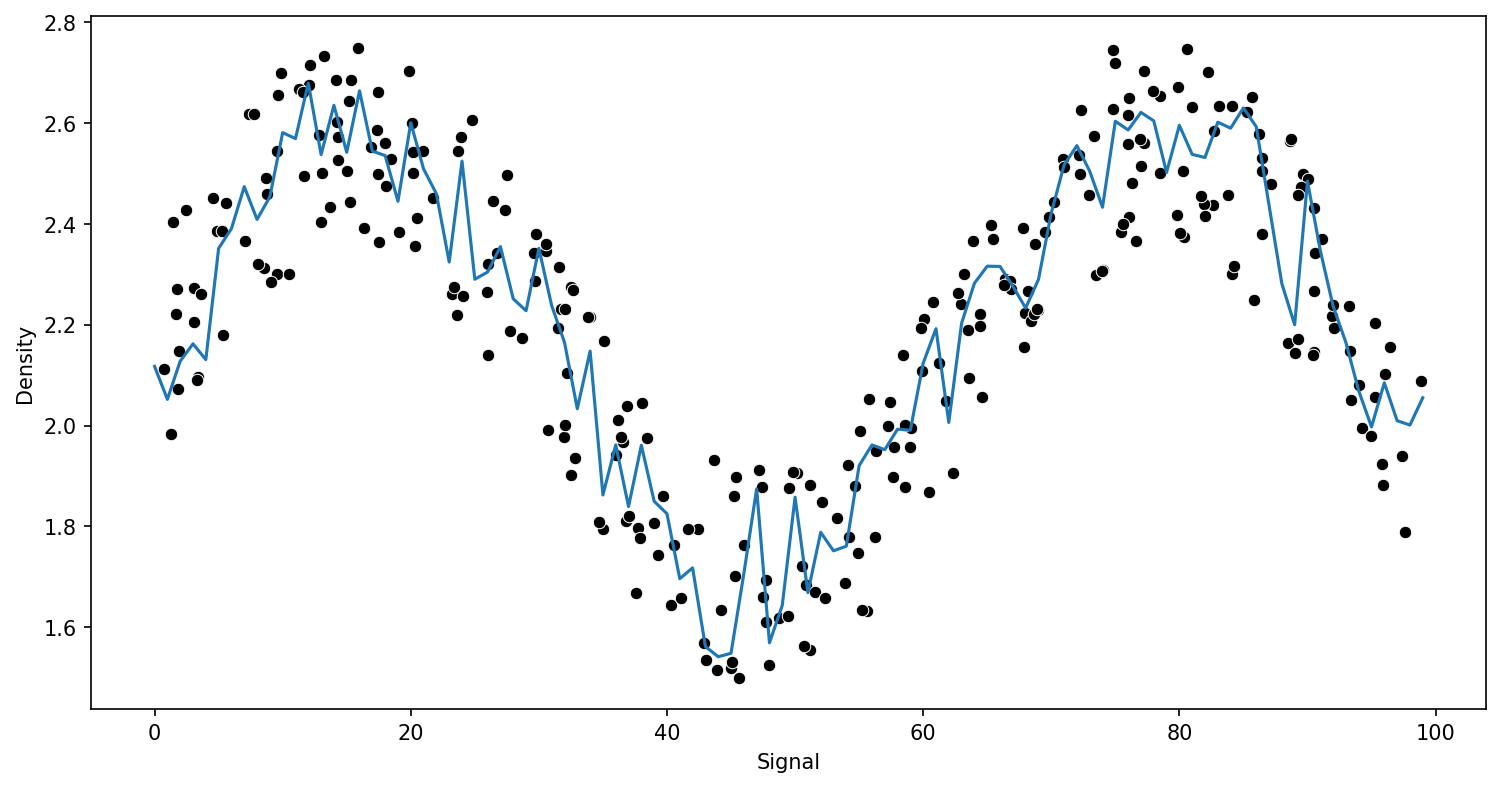

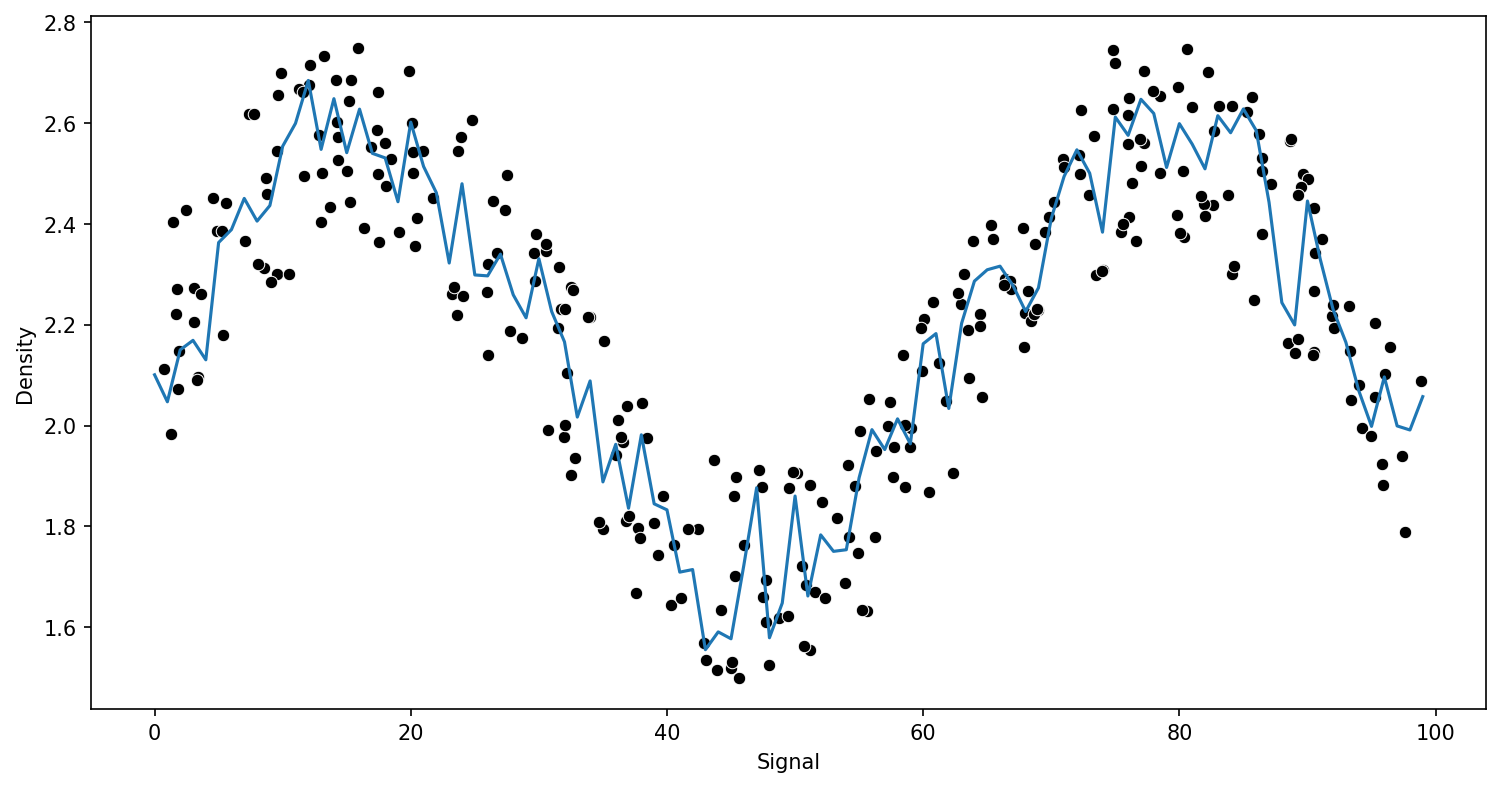

In [46]:
trees = [10,50,100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Градиентный бустинг

Мы изучим этот метод более подробно в следующем разделе.

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13336766447799286
MAE : 0.11184318220220522


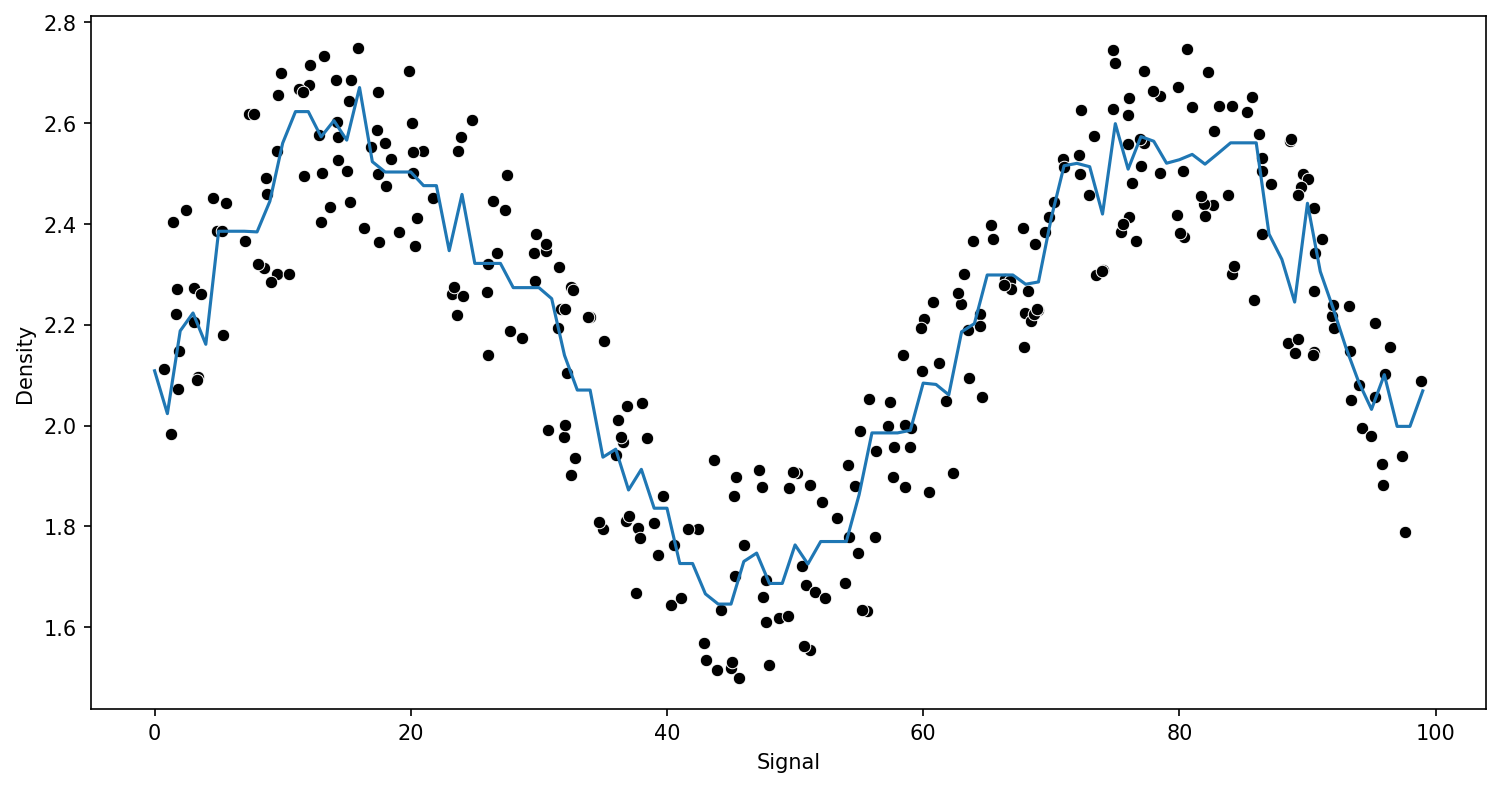

In [42]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [43]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13336766447799286
MAE : 0.11184318220220522


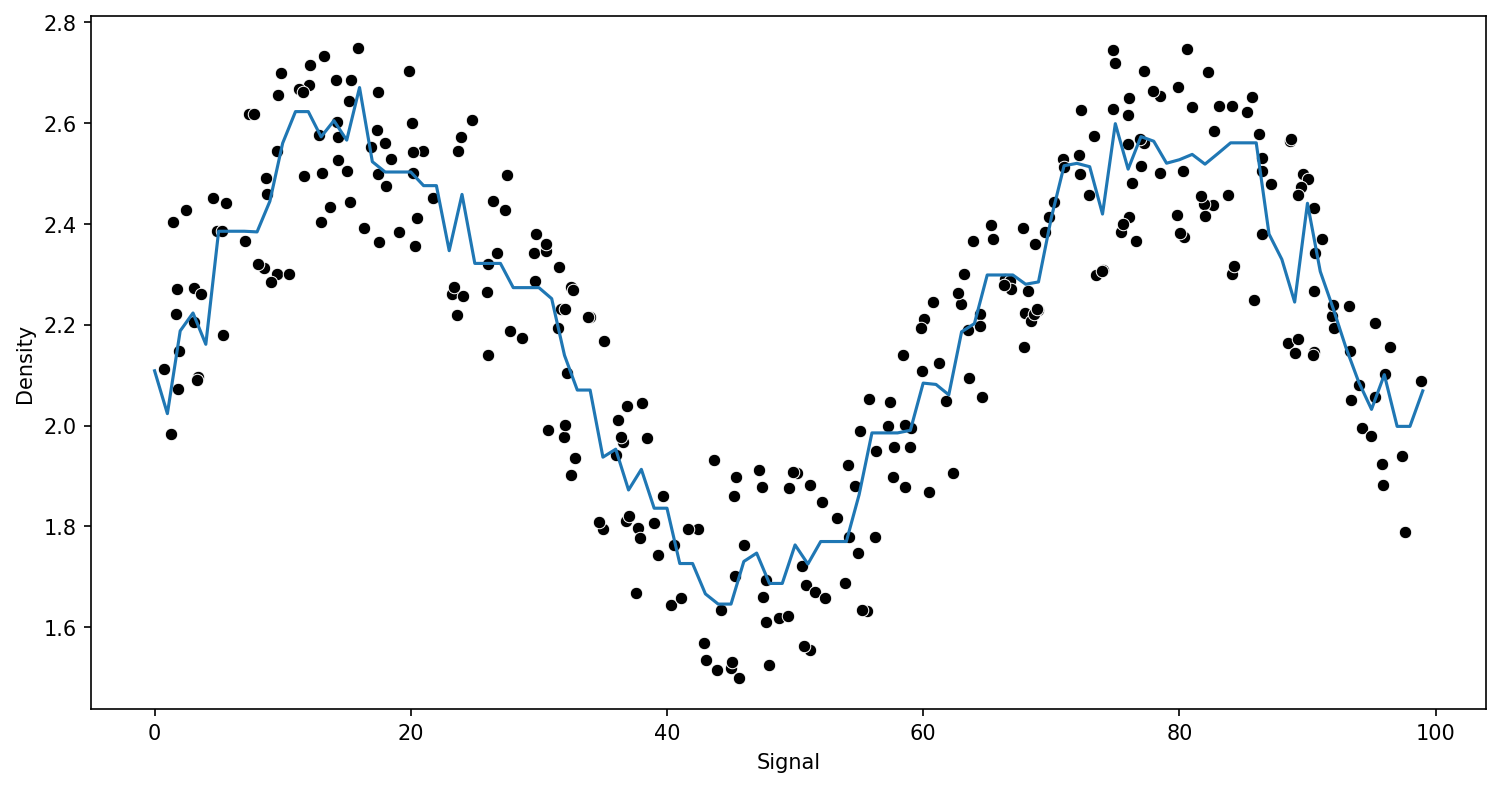

In [44]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)